In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

In [48]:
null_df = pd.DataFrame(pd.read_csv("../data_files/nullcline_output.csv"))
meta_nul = pd.DataFrame(pd.read_csv("../data_files/nullcline_metadata.csv"))
#display(null_df)

# Parse Metadata

In [49]:

display(meta_nul)
local_v_start=float(meta_nul["local_v_start"])
local_v_end=float(meta_nul["local_v_end"])
v_step=float(meta_nul["v_step"])
local_n_start=float(meta_nul["local_n_start"])
local_n_end=float(meta_nul["local_n_end"])
n_step=float(meta_nul["n_step"])

,local_v_start,local_v_end,v_step,local_n_start,local_n_end,n_step,
0,-0.15,0.45,0.0001,-0.05,0.12,0.0001,NaN


6002


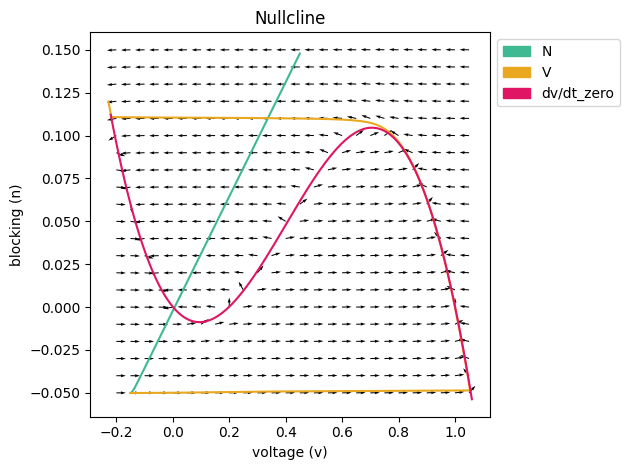

In [50]:
fig, ax = plt.subplots()
x1 = np.arange(local_v_start,local_v_end + 2*v_step,step=v_step)#depends on the for loop


label= column_name= ["N","V","dv/dt_zero"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(local_n_start-n_step,local_n_end,step=n_step)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot

x3 =  null_df["V_dn_0"].dropna()
y3 = null_df["N_dn_0"].dropna()

y3_pred = np.polyfit(x3, y3, deg=3)
#ax.plot(x3,np.polyval(y3_pred, x3),color = color_list[2]) 

x4 =  null_df["V_dv_0"].dropna()
y4 = null_df["N_dv_0"].dropna()
y4_pred =  np.polyfit(x4, y4, deg=3)
ax.plot(x4,np.polyval(y4_pred, x4),color = color_list[2]) 

x5 = null_df["Vdt"].dropna().to_numpy() 
y5 =  null_df["Ndt"].dropna().to_numpy()

x6 = null_df["V_x_dt"].dropna().to_numpy() 
y6 =  null_df["N_y_dt"].dropna().to_numpy()



u = x5/np.sqrt(x5**2 + y5**2)
v = y5/np.sqrt(x5**2 + y5**2)

plt.quiver(x6,y6,u,v)

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = "Nullcline"
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
plt.xlabel('voltage (v)')
plt.ylabel('blocking (n)')
ax.set_title(t)
plt.tight_layout()